# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [6]:
df_raw.count().sum()

1595

Answer: 1,595

#### Question 2. Create a summary table

In [7]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: By definition, standard deviation is used to measure the dispersion within a data set. Since the GRE has a larger range (from 260 - 340) compared to GPA (0.0 - 5.0), the numbers for a student's GRE has a greater opportunity to vary or spread out, resulting in a higher STD. 

#### Question 4. Drop data points with missing data


In [8]:
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [9]:
df_dropped = df_raw.dropna()

In [10]:
df_dropped.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Before dropping the null values, I totaled the # null values there were for each variable. After dropping the null values, I ran the function again and the results proved that all null values were dropped - code above to confirm. 

#### Question 6. Create box plots for GRE and GPA

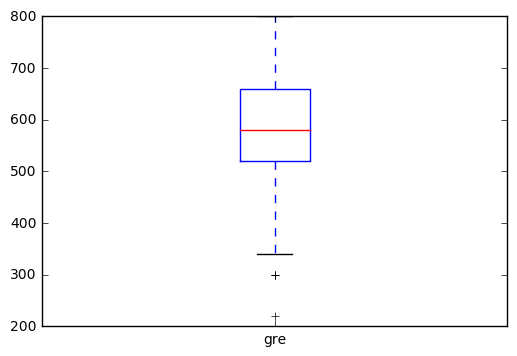

In [11]:
#boxplot 1
df_raw[['gre']].plot(kind='box');

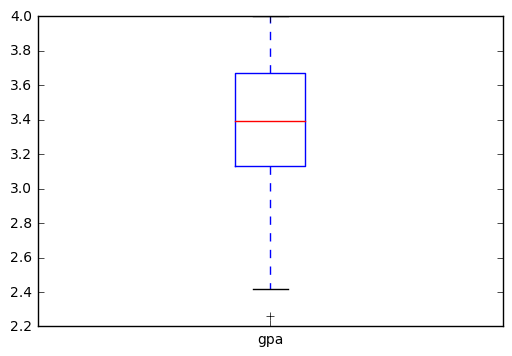

In [12]:
#boxplot 2 
df_raw[['gpa']].plot(kind='box');

#### Question 7. What do this plots show?

Answer: The plots show minimum number, median, first quartile, third quartile, and maximum number.

#### Question 8. Describe each distribution 

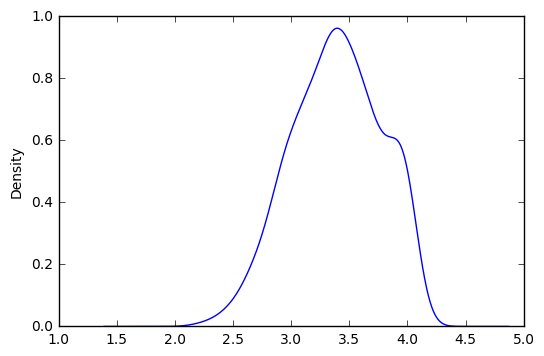

In [42]:
# KDE - Kernel Density Plot

df_raw['gpa'].plot(kind='kde')

GPA distribution is slight skewed to the left

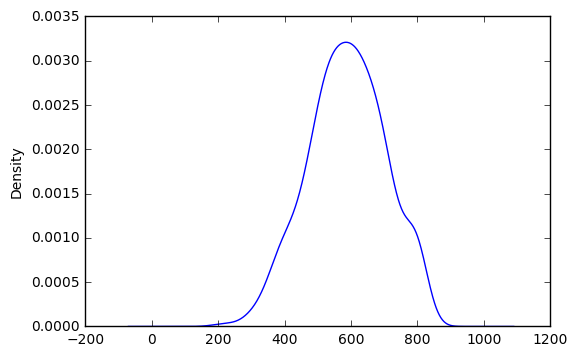

In [14]:
# plot the distribution of each variable 
# Create graph
df_raw['gre'].plot(kind='kde');

In [41]:
GRE distribution shows a normal distribution

SyntaxError: invalid syntax (<ipython-input-41-002a6614bc89>, line 1)

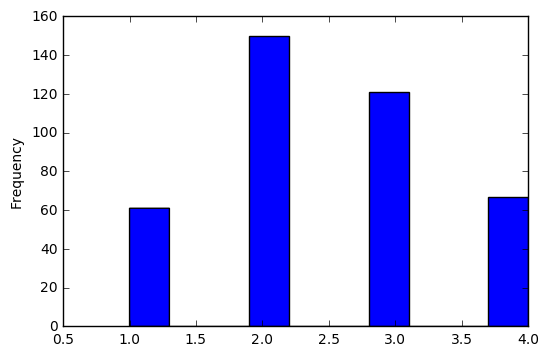

In [40]:
df_raw['prestige'].plot(kind='gde', x='prestige',y='admit');

Prestige distributed is skewed right. 

In [16]:
dmean = np.mean(df_raw)
dstd = np.std(df_raw)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Standard Deviation would = 1, kurtosis = 3, mean and median would also be very closely similar in number. GRE and GPA have normal distributions while prestige does not.  

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Since the prestige distribution is skewed and wavering, we can use either log transformation to disturb the distributrition in attempt to normalize it. 

#### Question 11. Which of our variables are potentially colinear? 

In [17]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: Prestige has the weakest correlation with admittance while GRE has a slightly more positive correlation when it comes to admittance. GRE and GPA has the stronglest correlation with one another. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Create a probelm statement and hypothesis. I would take the data set and organize it into a table where I can easily read it. I would then look to see if there is any missing data and if there is, fill the missing data in with the prestige's mean. I would then calculate the central tendancy (mean, mode, range), dispersion, and correlation between the variables to get a better idea of the variables' relationships with one another. After laying the groundwork, I would then take my findings and build a model by using graphs. A normal distrubtion graph and histogram can validate whether there is a correlation between the two variables. 

#### Question 14. What is your hypothesis? 

Answer: Undergraduate schools with average prestige (between 2 and 3) have a higher admittance rate compared to the lowest and highest prestige schools. If I want predict admissions rate, it will be more useful to look at GRE or GPA.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data


#### 2. Bonus: Log transform the skewed data

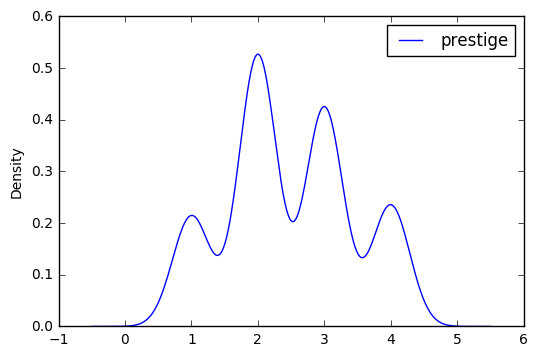

In [18]:
df_raw[['prestige']].plot(kind='kde');

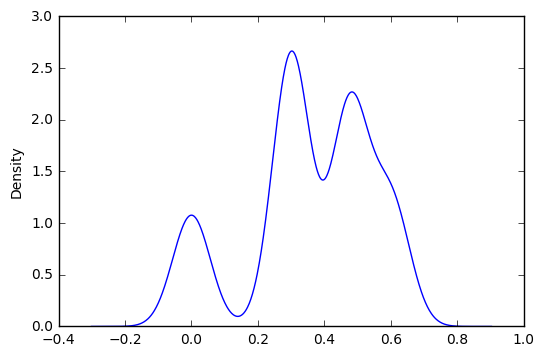

In [46]:
log_variable = (np.log10(df_raw['prestige']))
log_variable.plot(kind='kde');

#### 3. Advanced: Impute missing data

In [36]:
#mean without missing values
dropped_mean = df_dropped.mean()
#mean with missing values
missing_mean = df_raw.mean()

In [37]:
#median without missing values
dropped_med = df_dropped.median()
#median with missing values
missing_med = df_raw.median()

In [34]:
dropped_mean - missing_mean

admit      -0.000120
gre        -0.181259
gpa         0.001312
prestige    0.002449
dtype: float64

In [38]:
dropped_med - missing_med

admit       0.000
gre         0.000
gpa         0.005
prestige    0.000
dtype: float64

In [28]:
df_new = df_raw.fillna(df_raw.median())
df_new

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [158]:
df_new.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64